IMPORTS

In [716]:
import numpy as np
import pandas as pd

CREAR UNA SERIE
Es unidimensional (una columna)

In [717]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

CREAR UN DATAFRAME
Es multidimensional (son varias series juntas)

In [718]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [719]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

A         B         C         D
2013-01-01 -0.492938 -0.145929 -0.303882 -0.718850
2013-01-02 -0.033670 -0.780678  0.620969 -0.788084
2013-01-03  0.473400  0.042798 -0.069773  0.500676
2013-01-04  1.206263  0.420862  1.171377  0.655038
2013-01-05  0.975713 -0.168010 -1.469449  0.395704
2013-01-06 -1.683274 -0.808109  0.857489  0.084114

In [720]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

In [721]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

VER DATOS

In [722]:
# Ver datos a la "cabeza" de la tabla
df.head()

A         B         C         D
2013-01-01 -0.492938 -0.145929 -0.303882 -0.718850
2013-01-02 -0.033670 -0.780678  0.620969 -0.788084
2013-01-03  0.473400  0.042798 -0.069773  0.500676
2013-01-04  1.206263  0.420862  1.171377  0.655038
2013-01-05  0.975713 -0.168010 -1.469449  0.395704

In [723]:
# Ver datos a la "cola" de la tabla
df.tail()

A         B         C         D
2013-01-02 -0.033670 -0.780678  0.620969 -0.788084
2013-01-03  0.473400  0.042798 -0.069773  0.500676
2013-01-04  1.206263  0.420862  1.171377  0.655038
2013-01-05  0.975713 -0.168010 -1.469449  0.395704
2013-01-06 -1.683274 -0.808109  0.857489  0.084114

In [724]:
#index
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [725]:
#Columnas
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

CONVERTIR DE PANDA A REPRESENTACION EN NUMPY

In [726]:
df.to_numpy()

array([[-0.49293757, -0.14592896, -0.30388203, -0.71884958],
       [-0.03366951, -0.78067814,  0.62096876, -0.78808382],
       [ 0.4734002 ,  0.04279796, -0.0697728 ,  0.50067553],
       [ 1.2062627 ,  0.42086237,  1.1713772 ,  0.65503759],
       [ 0.97571347, -0.16801039, -1.46944886,  0.39570418],
       [-1.6832737 , -0.80810881,  0.85748913,  0.08411391]])

In [727]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

DESCRIBIR ESTADISTICAMENTE LOS DATOS

In [728]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.074249 -0.239844  0.134455  0.021433
std    1.065425  0.478712  0.963435  0.629042
min   -1.683274 -0.808109 -1.469449 -0.788084
25%   -0.378121 -0.627511 -0.245355 -0.518109
50%    0.219865 -0.156970  0.275598  0.239909
75%    0.850135 -0.004384  0.798359  0.474433
max    1.206263  0.420862  1.171377  0.655038

TRANSPONER DATOS

In [729]:
df.T

2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.492938   -0.033670    0.473400    1.206263    0.975713   -1.683274
B   -0.145929   -0.780678    0.042798    0.420862   -0.168010   -0.808109
C   -0.303882    0.620969   -0.069773    1.171377   -1.469449    0.857489
D   -0.718850   -0.788084    0.500676    0.655038    0.395704    0.084114

ORDENAR POR INDICE

In [730]:
df.sort_index(axis=1, ascending=False)

D         C         B         A
2013-01-01 -0.718850 -0.303882 -0.145929 -0.492938
2013-01-02 -0.788084  0.620969 -0.780678 -0.033670
2013-01-03  0.500676 -0.069773  0.042798  0.473400
2013-01-04  0.655038  1.171377  0.420862  1.206263
2013-01-05  0.395704 -1.469449 -0.168010  0.975713
2013-01-06  0.084114  0.857489 -0.808109 -1.683274

ORDENAR POR VALORES

In [731]:
df.sort_values(by="B")

A         B         C         D
2013-01-06 -1.683274 -0.808109  0.857489  0.084114
2013-01-02 -0.033670 -0.780678  0.620969 -0.788084
2013-01-05  0.975713 -0.168010 -1.469449  0.395704
2013-01-01 -0.492938 -0.145929 -0.303882 -0.718850
2013-01-03  0.473400  0.042798 -0.069773  0.500676
2013-01-04  1.206263  0.420862  1.171377  0.655038

SELECCIONAR DATOS

una columna

In [732]:
df["A"]

2013-01-01   -0.492938
2013-01-02   -0.033670
2013-01-03    0.473400
2013-01-04    1.206263
2013-01-05    0.975713
2013-01-06   -1.683274
Freq: D, Name: A, dtype: float64

slice de filas

In [733]:
df[0:3]

A         B         C         D
2013-01-01 -0.492938 -0.145929 -0.303882 -0.718850
2013-01-02 -0.033670 -0.780678  0.620969 -0.788084
2013-01-03  0.473400  0.042798 -0.069773  0.500676

por etiqueta

In [734]:
df.loc[dates[0]]

A   -0.492938
B   -0.145929
C   -0.303882
D   -0.718850
Name: 2013-01-01 00:00:00, dtype: float64

In [735]:
df.loc[:, ["A", "B"]]

A         B
2013-01-01 -0.492938 -0.145929
2013-01-02 -0.033670 -0.780678
2013-01-03  0.473400  0.042798
2013-01-04  1.206263  0.420862
2013-01-05  0.975713 -0.168010
2013-01-06 -1.683274 -0.808109

In [736]:
df.loc["20130102":"20130104", ["A", "B"]]

A         B
2013-01-02 -0.033670 -0.780678
2013-01-03  0.473400  0.042798
2013-01-04  1.206263  0.420862

In [737]:
df.loc["20130102", ["A", "B"]]

A   -0.033670
B   -0.780678
Name: 2013-01-02 00:00:00, dtype: float64

In [738]:
df.loc[dates[0], "A"]

-0.49293756881169193

In [739]:
# equivalente al anterior
df.at[dates[0], "A"]

-0.49293756881169193

por posicion

In [740]:
df.iloc[3]

A    1.206263
B    0.420862
C    1.171377
D    0.655038
Name: 2013-01-04 00:00:00, dtype: float64

In [741]:
df.iloc[3:5, 0:2]

A         B
2013-01-04  1.206263  0.420862
2013-01-05  0.975713 -0.168010

In [742]:
df.iloc[[1, 2, 4], [0, 2]]

A         C
2013-01-02 -0.033670  0.620969
2013-01-03  0.473400 -0.069773
2013-01-05  0.975713 -1.469449

In [743]:
df.iloc[1:3, :]

A         B         C         D
2013-01-02 -0.03367 -0.780678  0.620969 -0.788084
2013-01-03  0.47340  0.042798 -0.069773  0.500676

In [744]:
df.iloc[:, 1:3]

B         C
2013-01-01 -0.145929 -0.303882
2013-01-02 -0.780678  0.620969
2013-01-03  0.042798 -0.069773
2013-01-04  0.420862  1.171377
2013-01-05 -0.168010 -1.469449
2013-01-06 -0.808109  0.857489

In [745]:
df.iloc[1, 1]

-0.7806781356620387

In [746]:
#equivalente al anterior
df.iloc[1, 1]

-0.7806781356620387

indexing con booleanos

In [747]:
df[df["A"] > 0]

A         B         C         D
2013-01-03  0.473400  0.042798 -0.069773  0.500676
2013-01-04  1.206263  0.420862  1.171377  0.655038
2013-01-05  0.975713 -0.168010 -1.469449  0.395704

In [748]:
df[df > 0]

A         B         C         D
2013-01-01       NaN       NaN       NaN       NaN
2013-01-02       NaN       NaN  0.620969       NaN
2013-01-03  0.473400  0.042798       NaN  0.500676
2013-01-04  1.206263  0.420862  1.171377  0.655038
2013-01-05  0.975713       NaN       NaN  0.395704
2013-01-06       NaN       NaN  0.857489  0.084114

In [749]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

A         B         C         D      E
2013-01-01 -0.492938 -0.145929 -0.303882 -0.718850    one
2013-01-02 -0.033670 -0.780678  0.620969 -0.788084    one
2013-01-03  0.473400  0.042798 -0.069773  0.500676    two
2013-01-04  1.206263  0.420862  1.171377  0.655038  three
2013-01-05  0.975713 -0.168010 -1.469449  0.395704   four
2013-01-06 -1.683274 -0.808109  0.857489  0.084114  three

In [750]:
df2[df2["E"].isin(["two", "four"])]

A         B         C         D     E
2013-01-03  0.473400  0.042798 -0.069773  0.500676   two
2013-01-05  0.975713 -0.168010 -1.469449  0.395704  four

SETTING , DAR VALOR

In [751]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [752]:
df["F"] = s1
df

A         B         C         D    F
2013-01-01 -0.492938 -0.145929 -0.303882 -0.718850  NaN
2013-01-02 -0.033670 -0.780678  0.620969 -0.788084  1.0
2013-01-03  0.473400  0.042798 -0.069773  0.500676  2.0
2013-01-04  1.206263  0.420862  1.171377  0.655038  3.0
2013-01-05  0.975713 -0.168010 -1.469449  0.395704  4.0
2013-01-06 -1.683274 -0.808109  0.857489  0.084114  5.0

por etiqueta

In [753]:
df.at[dates[0], "A"] = 0
df

A         B         C         D    F
2013-01-01  0.000000 -0.145929 -0.303882 -0.718850  NaN
2013-01-02 -0.033670 -0.780678  0.620969 -0.788084  1.0
2013-01-03  0.473400  0.042798 -0.069773  0.500676  2.0
2013-01-04  1.206263  0.420862  1.171377  0.655038  3.0
2013-01-05  0.975713 -0.168010 -1.469449  0.395704  4.0
2013-01-06 -1.683274 -0.808109  0.857489  0.084114  5.0

por posicion

In [754]:
df.iat[0, 1] = 0
df

A         B         C         D    F
2013-01-01  0.000000  0.000000 -0.303882 -0.718850  NaN
2013-01-02 -0.033670 -0.780678  0.620969 -0.788084  1.0
2013-01-03  0.473400  0.042798 -0.069773  0.500676  2.0
2013-01-04  1.206263  0.420862  1.171377  0.655038  3.0
2013-01-05  0.975713 -0.168010 -1.469449  0.395704  4.0
2013-01-06 -1.683274 -0.808109  0.857489  0.084114  5.0

con array de numpy

In [755]:
df.loc[:, "D"] = np.array([5] * len(df))
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.303882  5  NaN
2013-01-02 -0.033670 -0.780678  0.620969  5  1.0
2013-01-03  0.473400  0.042798 -0.069773  5  2.0
2013-01-04  1.206263  0.420862  1.171377  5  3.0
2013-01-05  0.975713 -0.168010 -1.469449  5  4.0
2013-01-06 -1.683274 -0.808109  0.857489  5  5.0

In [756]:
df2 = df.copy()
#pasa positivos a negativos
df2[df2 > 0] = -df2
df2

A         B         C  D    F
2013-01-01  0.000000  0.000000 -0.303882 -5  NaN
2013-01-02 -0.033670 -0.780678 -0.620969 -5 -1.0
2013-01-03 -0.473400 -0.042798 -0.069773 -5 -2.0
2013-01-04 -1.206263 -0.420862 -1.171377 -5 -3.0
2013-01-05 -0.975713 -0.168010 -1.469449 -5 -4.0
2013-01-06 -1.683274 -0.808109 -0.857489 -5 -5.0

DATOS QUE FALTAN
panda ocupa np.nan para representar datos que faltan

In [757]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

A         B         C  D    F    E
2013-01-01  0.000000  0.000000 -0.303882  5  NaN  1.0
2013-01-02 -0.033670 -0.780678  0.620969  5  1.0  1.0
2013-01-03  0.473400  0.042798 -0.069773  5  2.0  NaN
2013-01-04  1.206263  0.420862  1.171377  5  3.0  NaN

eliminar filas con datos que falten

In [758]:
df1.dropna(how="any")

A         B         C  D    F    E
2013-01-02 -0.03367 -0.780678  0.620969  5  1.0  1.0

llenar datos faltantes

In [759]:
df1.fillna(value=5)

A         B         C  D    F    E
2013-01-01  0.000000  0.000000 -0.303882  5  5.0  1.0
2013-01-02 -0.033670 -0.780678  0.620969  5  1.0  1.0
2013-01-03  0.473400  0.042798 -0.069773  5  2.0  5.0
2013-01-04  1.206263  0.420862  1.171377  5  3.0  5.0

obtener mascara de booleanos donde los datos sean NaN

In [760]:
pd.isna(df1)

A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True

ESTADISTICAS

Media

In [761]:
df.mean()

A    0.156406
B   -0.215523
C    0.134455
D    5.000000
F    3.000000
dtype: float64

Media del otro axis

In [762]:
df.mean(1)

2013-01-01    1.174029
2013-01-02    1.161324
2013-01-03    1.489285
2013-01-04    2.159700
2013-01-05    1.667651
2013-01-06    1.673221
Freq: D, dtype: float64

Operaciones con objetos de distintas dimensiones

In [763]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [764]:
df.sub(s, axis="index")

A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03 -0.526600 -0.957202 -1.069773  4.0  1.0
2013-01-04 -1.793737 -2.579138 -1.828623  2.0  0.0
2013-01-05 -4.024287 -5.168010 -6.469449  0.0 -1.0
2013-01-06       NaN       NaN       NaN  NaN  NaN

APLICAR

aplicar funcion a los datos

In [765]:
df.apply(np.cumsum)

A         B         C   D     F
2013-01-01  0.000000  0.000000 -0.303882   5   NaN
2013-01-02 -0.033670 -0.780678  0.317087  10   1.0
2013-01-03  0.439731 -0.737880  0.247314  15   3.0
2013-01-04  1.645993 -0.317018  1.418691  20   6.0
2013-01-05  2.621707 -0.485028 -0.050758  25  10.0
2013-01-06  0.938433 -1.293137  0.806731  30  15.0

In [766]:
df.apply(lambda x: x.max() - x.min())

A    2.889536
B    1.228971
C    2.640826
D    0.000000
F    4.000000
dtype: float64

HISTOGRAMACION

In [767]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    2
2    4
3    2
4    5
5    0
6    4
7    2
8    1
9    0
dtype: int64

Conteo

In [768]:
s.value_counts()

2    3
4    2
0    2
6    1
5    1
1    1
dtype: int64

METODOS DE STRING

In [769]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

MERGE(UNIR)

concat

In [770]:
df = pd.DataFrame(np.random.randn(10, 4))
df

0         1         2         3
0  0.229522  1.002319  0.188416  1.411145
1 -2.243800  1.086871 -0.854513  1.960032
2 -0.212750  0.166735 -0.369705 -1.307033
3 -0.574520 -0.718890 -1.143568  0.646577
4  0.953868  0.246236 -0.336917  0.329136
5 -0.407990  0.163924  0.222371 -0.414597
6 -0.168532 -0.251833  1.189336 -0.257913
7  0.372873 -1.166071  0.223154  0.460614
8 -0.012540 -1.275576 -0.141062 -0.601015
9  1.795398 -0.056211 -1.758130  0.594622

In [771]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.229522  1.002319  0.188416  1.411145
 1 -2.243800  1.086871 -0.854513  1.960032
 2 -0.212750  0.166735 -0.369705 -1.307033,
           0         1         2         3
 3 -0.574520 -0.718890 -1.143568  0.646577
 4  0.953868  0.246236 -0.336917  0.329136
 5 -0.407990  0.163924  0.222371 -0.414597
 6 -0.168532 -0.251833  1.189336 -0.257913,
           0         1         2         3
 7  0.372873 -1.166071  0.223154  0.460614
 8 -0.012540 -1.275576 -0.141062 -0.601015
 9  1.795398 -0.056211 -1.758130  0.594622]

In [772]:
pd.concat(pieces)

0         1         2         3
0  0.229522  1.002319  0.188416  1.411145
1 -2.243800  1.086871 -0.854513  1.960032
2 -0.212750  0.166735 -0.369705 -1.307033
3 -0.574520 -0.718890 -1.143568  0.646577
4  0.953868  0.246236 -0.336917  0.329136
5 -0.407990  0.163924  0.222371 -0.414597
6 -0.168532 -0.251833  1.189336 -0.257913
7  0.372873 -1.166071  0.223154  0.460614
8 -0.012540 -1.275576 -0.141062 -0.601015
9  1.795398 -0.056211 -1.758130  0.594622

JOIN

In [773]:
#left join
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
left

key  lval
0  foo     1
1  foo     2

In [774]:
#right join
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
right

key  rval
0  foo     4
1  foo     5

In [775]:
pd.merge(left, right, on="key")

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

GROUPING

Splitting the data into groups based on some criteria

Applying a function to each group independently

Combining the results into a data structure

In [776]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

A      B         C         D
0  foo    one -1.351353 -1.346182
1  bar    one -0.913672  1.232523
2  foo    two -0.114438  1.508549
3  bar  three -0.036977  1.063371
4  foo    two -0.300269 -0.606801
5  bar    two -0.538567 -0.006207
6  foo    one -0.454317 -2.647813
7  foo  three -1.011522 -1.606882

Los junta por a y luego los suma

In [777]:
df.groupby("A").sum()

C         D
A                      
bar -1.489216  2.289687
foo -3.231900 -4.699129

engrupando con multiples columnas
el group by como que va haciendo un filtro para la funcion

In [778]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.913672  1.232523
    three -0.036977  1.063371
    two   -0.538567 -0.006207
foo one   -1.805670 -3.993995
    three -1.011522 -1.606882
    two   -0.414708  0.901748

RESHAPING
cambiar la forma

In [779]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]
df2

A         B
first second                    
bar   one     0.334648  0.765190
      two     0.147558  0.004134
baz   one    -1.856031  1.906186
      two    -1.514656  1.197880

comprimir columnas del dataframe

In [780]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.334648
               B    0.765190
       two     A    0.147558
               B    0.004134
baz    one     A   -1.856031
               B    1.906186
       two     A   -1.514656
               B    1.197880
dtype: float64

descomprimir

In [781]:
stacked.unstack()

A         B
first second                    
bar   one     0.334648  0.765190
      two     0.147558  0.004134
baz   one    -1.856031  1.906186
      two    -1.514656  1.197880

In [782]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.334648  0.147558
      B  0.765190  0.004134
baz   A -1.856031 -1.514656
      B  1.906186  1.197880

In [783]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.334648 -1.856031
       B  0.765190  1.906186
two    A  0.147558 -1.514656
       B  0.004134  1.197880

PIVOTEAR TABLAS

In [784]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

A  B    C         D         E
0     one  A  foo -0.638639 -1.646437
1     one  B  foo  0.420594  0.772089
2     two  C  foo -0.332238 -0.064266
3   three  A  bar -0.053060  0.711054
4     one  B  bar  1.326170 -0.174862
5     one  C  bar  1.701397  0.613619
6     two  A  foo  0.681914 -1.204613
7   three  B  foo -0.998683  0.485006
8     one  C  foo  1.361883 -2.077134
9     one  A  bar  1.640300  0.459332
10    two  B  bar  0.836763 -0.381731
11  three  C  bar  0.727269 -0.827067

In [785]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.640300 -0.638639
      B  1.326170  0.420594
      C  1.701397  1.361883
three A -0.053060       NaN
      B       NaN -0.998683
      C  0.727269       NaN
two   A       NaN  0.681914
      B  0.836763       NaN
      C       NaN -0.332238

SERIES DE TIEMPO

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion

(e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications

In [786]:
rng = pd.date_range("1/1/2012", periods=120, freq="S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               ...
               '2012-01-01 00:01:50', '2012-01-01 00:01:51',
               '2012-01-01 00:01:52', '2012-01-01 00:01:53',
               '2012-01-01 00:01:54', '2012-01-01 00:01:55',
               '2012-01-01 00:01:56', '2012-01-01 00:01:57',
               '2012-01-01 00:01:58', '2012-01-01 00:01:59'],
              dtype='datetime64[ns]', length=120, freq='S')

In [787]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    374
2012-01-01 00:00:01    326
2012-01-01 00:00:02    195
2012-01-01 00:00:03    300
2012-01-01 00:00:04    228
                      ... 
2012-01-01 00:01:55    381
2012-01-01 00:01:56    467
2012-01-01 00:01:57    478
2012-01-01 00:01:58    428
2012-01-01 00:01:59    406
Freq: S, Length: 120, dtype: int64

In [788]:
ts.sum()

31146

REGLAS PARA EL RESAMPLE
B         business day frequency

C         custom business day frequency (experimental)

D         calendar day frequency

W         weekly frequency

M         month end frequency

SM        semi-month end frequency (15th and end of month)

BM        business month end frequency

CBM       custom business month end frequency

MS        month start frequency

SMS       semi-month start frequency (1st and 15th)

BMS       business month start frequency

CBMS      custom business month start frequency

Q         quarter end frequency

BQ        business quarter endfrequency

QS        quarter start frequency

BQS       business quarter start frequency

A         year end frequency

BA, BY    business year end frequency

AS, YS    year start frequency

BAS, BYS  business year start frequency

BH        business hour frequency

H         hourly frequency

T, min    minutely frequency

S         secondly frequency

L, ms     milliseconds

U, us     microseconds

N         nanoseconds

In [789]:
ts.resample("2S").sum()

2012-01-01 00:00:00    700
2012-01-01 00:00:02    495
2012-01-01 00:00:04    626
2012-01-01 00:00:06    714
2012-01-01 00:00:08    466
2012-01-01 00:00:10    184
2012-01-01 00:00:12    540
2012-01-01 00:00:14    541
2012-01-01 00:00:16    642
2012-01-01 00:00:18     46
2012-01-01 00:00:20    362
2012-01-01 00:00:22    742
2012-01-01 00:00:24    474
2012-01-01 00:00:26    256
2012-01-01 00:00:28    483
2012-01-01 00:00:30    657
2012-01-01 00:00:32    129
2012-01-01 00:00:34    412
2012-01-01 00:00:36    489
2012-01-01 00:00:38    509
2012-01-01 00:00:40    791
2012-01-01 00:00:42    625
2012-01-01 00:00:44    430
2012-01-01 00:00:46    269
2012-01-01 00:00:48    765
2012-01-01 00:00:50    273
2012-01-01 00:00:52    238
2012-01-01 00:00:54    435
2012-01-01 00:00:56    281
2012-01-01 00:00:58    581
2012-01-01 00:01:00    489
2012-01-01 00:01:02    219
2012-01-01 00:01:04    509
2012-01-01 00:01:06    809
2012-01-01 00:01:08    468
2012-01-01 00:01:10    407
2012-01-01 00:01:12    658
2

In [790]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06   -0.929965
2012-03-07   -0.660536
2012-03-08    1.403335
2012-03-09   -0.729188
2012-03-10    0.723224
Freq: D, dtype: float64

representacion con time-zone

In [791]:
ts_utc = ts.tz_localize("UTC")

ts_utc

2012-03-06 00:00:00+00:00   -0.929965
2012-03-07 00:00:00+00:00   -0.660536
2012-03-08 00:00:00+00:00    1.403335
2012-03-09 00:00:00+00:00   -0.729188
2012-03-10 00:00:00+00:00    0.723224
Freq: D, dtype: float64

convertir de distintos lapsos de tiempo

In [792]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31   -0.042446
2012-02-29   -0.281546
2012-03-31    1.136680
2012-04-30   -1.773212
2012-05-31   -1.204483
Freq: M, dtype: float64

In [793]:
ps = ts.to_period()

ps

2012-01   -0.042446
2012-02   -0.281546
2012-03    1.136680
2012-04   -1.773212
2012-05   -1.204483
Freq: M, dtype: float64

In [794]:
ps.to_timestamp()

2012-01-01   -0.042446
2012-02-01   -0.281546
2012-03-01    1.136680
2012-04-01   -1.773212
2012-05-01   -1.204483
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [795]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

ts.head()

1990-03-01 09:00   -0.155063
1990-06-01 09:00   -3.230578
1990-09-01 09:00   -0.154992
1990-12-01 09:00    1.015293
1991-03-01 09:00    1.103499
Freq: H, dtype: float64

CATEGORICOS

In [796]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [797]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

id raw_grade      grade
0   1         a  very good
1   2         b       good
2   3         b       good
3   4         a  very good
4   5         a  very good
5   6         e   very bad

In [798]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [799]:
df.sort_values(by="grade")

id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good

In [800]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

GRAFICAR

In [801]:
import matplotlib.pyplot as plt
plt.close("all")

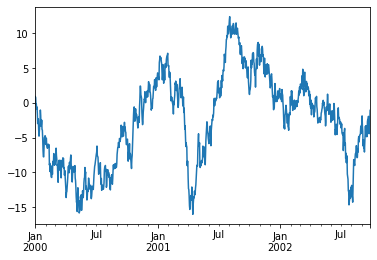

In [802]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

<Figure size 432x288 with 0 Axes>

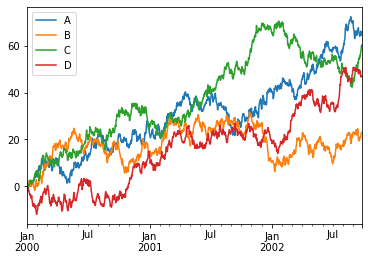

In [803]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');

TOMAR DATOS IN/OUT

csv

escribir csv

In [804]:
df.to_csv("foo.csv")

leer un csv

In [805]:
pd.read_csv("foo.csv")

Unnamed: 0          A          B          C          D
0    2000-01-01   0.433195  -0.250586   0.310458  -1.231605
1    2000-01-02   1.064950  -0.388655   0.304800  -1.520903
2    2000-01-03   0.629725   0.319083   0.198377  -1.170690
3    2000-01-04   0.277506   0.959979  -0.857729  -1.955683
4    2000-01-05  -0.184229   1.929869  -0.276484  -0.717834
..          ...        ...        ...        ...        ...
995  2002-09-22  65.568750  20.804489  56.668557  48.757629
996  2002-09-23  66.160588  20.946290  57.579127  46.635785
997  2002-09-24  65.316622  22.611240  58.185365  46.729763
998  2002-09-25  66.071323  22.742771  59.897683  46.836761
999  2002-09-26  64.528364  22.892111  60.309008  47.025267

[1000 rows x 5 columns]

HDF5

escribir HDF5

In [806]:
df.to_hdf("foo.h5", "df")

leer HDF5

In [807]:
pd.read_hdf("foo.h5", "df")

A          B          C          D
2000-01-01   0.433195  -0.250586   0.310458  -1.231605
2000-01-02   1.064950  -0.388655   0.304800  -1.520903
2000-01-03   0.629725   0.319083   0.198377  -1.170690
2000-01-04   0.277506   0.959979  -0.857729  -1.955683
2000-01-05  -0.184229   1.929869  -0.276484  -0.717834
...               ...        ...        ...        ...
2002-09-22  65.568750  20.804489  56.668557  48.757629
2002-09-23  66.160588  20.946290  57.579127  46.635785
2002-09-24  65.316622  22.611240  58.185365  46.729763
2002-09-25  66.071323  22.742771  59.897683  46.836761
2002-09-26  64.528364  22.892111  60.309008  47.025267

[1000 rows x 4 columns]

excel

escribir excel

In [808]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

leer excel

In [809]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

Unnamed: 0          A          B          C          D
0   2000-01-01   0.433195  -0.250586   0.310458  -1.231605
1   2000-01-02   1.064950  -0.388655   0.304800  -1.520903
2   2000-01-03   0.629725   0.319083   0.198377  -1.170690
3   2000-01-04   0.277506   0.959979  -0.857729  -1.955683
4   2000-01-05  -0.184229   1.929869  -0.276484  -0.717834
..         ...        ...        ...        ...        ...
995 2002-09-22  65.568750  20.804489  56.668557  48.757629
996 2002-09-23  66.160588  20.946290  57.579127  46.635785
997 2002-09-24  65.316622  22.611240  58.185365  46.729763
998 2002-09-25  66.071323  22.742771  59.897683  46.836761
999 2002-09-26  64.528364  22.892111  60.309008  47.025267

[1000 rows x 5 columns]

GOTCHAS

If you are attempting to perform an operation you might see an exception like:


In [810]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().